In [1]:
#!pip install --upgrade oct2py

In [2]:
with open('t_call.m', 'w') as file:
    file.write("stoch_simul(nograph, order=1, periods=1000, irf=200);")

In [3]:
# resets the namespace by removing all names defined by the user
%reset -f            
import numpy as np
import scipy as sp
import oct2py
from oct2py import octave
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os
from scipy.optimize import fsolve
import sys
import math
plt.close('all')


Tells octave where to find the .m file it will run. The file is `call_dynare`. Set to wherever you have this file. 




In [4]:
a=octave.addpath(os.path.expanduser('C:/Users/blankenw/GitHub/dynare_progs/example'))

If you see the following error message:
    
warning: function C:\dynare\6.1\matlab\+identification\display.m shadows a built-in function

it can be ignored

In [5]:
y=1
x=octave.call_dynare(y,nout=1)



    call_dynare at line 4 column 4
    _pyeval at line 57 column 30

    call_dynare at line 4 column 4
    _pyeval at line 57 column 30

Starting Dynare (version 6.1).
Calling Dynare with arguments: none
Starting preprocessing of the model file ...
Found 6 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
2 block(s) found:
  0 recursive block(s) and 2 simultaneous block(s).
  the largest simultaneous block has 4 equation(s)
                                 and 4 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  0 recursive block(s) and 2 simultaneous block(s).
  the largest simultaneous block has 4 equation(s)
                                 and 4 feedback variable(s).
Preprocessing completed.
Preprocessing time: 0h00m01s.

Dynare creates a `structure` which we will need so we `pull` it.

In [6]:
x = octave.pull('oo_') 

    _pyeval at line 28 column 9

    _pyeval at line 28 column 9



In [7]:
type(x)

oct2py.io.Struct

In [9]:
class StructToNumpy:
    def __init__(self, x):
        self.x_dict = {key: np.array(value) for key, value in x.items()}
        for key, value in self.x_dict.items():
            setattr(self, key, value)
        dict_irfs = self.irfs.item()
        self.dict_irfs = {key: np.array(value) for key, value in dict_irfs.items()}
        for key, value in self.dict_irfs.items():
            if key!='list':
                setattr(self, 'ir_'+ key, value)
        self.list_irfs = self.list_irfs()
        
    def list_irfs(self):
        return sorted((attr for attr in dir(self) if attr.startswith('ir_')), key=lambda x: x[-1])
    
    def plot_irfs(self, end_char, cols=4):
        tot = len({key[-1] for key in self.dict_irfs.keys() if key[-1] == end_char})
        tot = len({key[-1] for key in self.dict_irfs.keys()})
        rows = math.ceil(len(self.dict_irfs) / (tot * cols))
        fig, axs = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Create 'rows' x 4 subplots
        for i, (key, value) in enumerate((k, v) for k, v in self.dict_irfs.items() if k[-1] == end_char):
            row = i // (cols)
            col = i % cols
            axs[row, col].plot(value[0])
            axs[row, col].set_title(key)
        plt.tight_layout()  # Adjust subplot parameters to prevent overlap
        plt.show()

In [10]:
t1 = StructToNumpy(x)


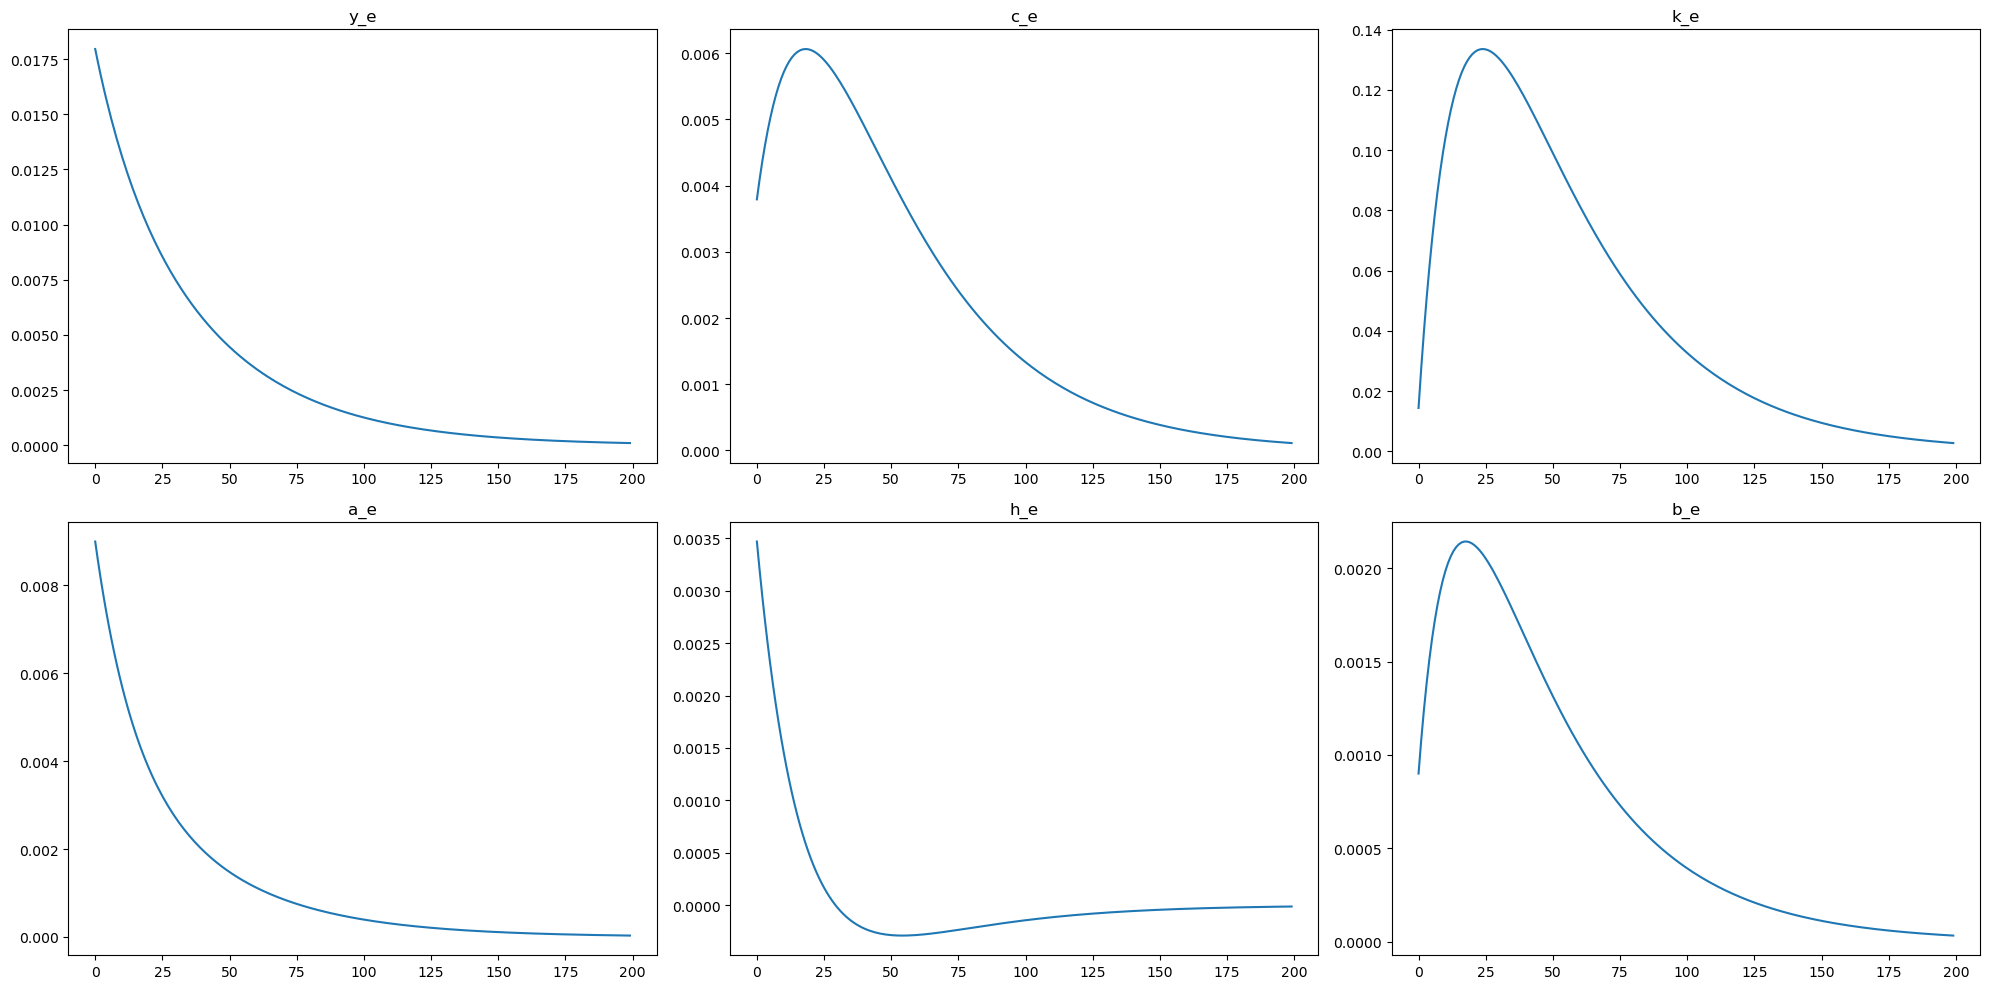

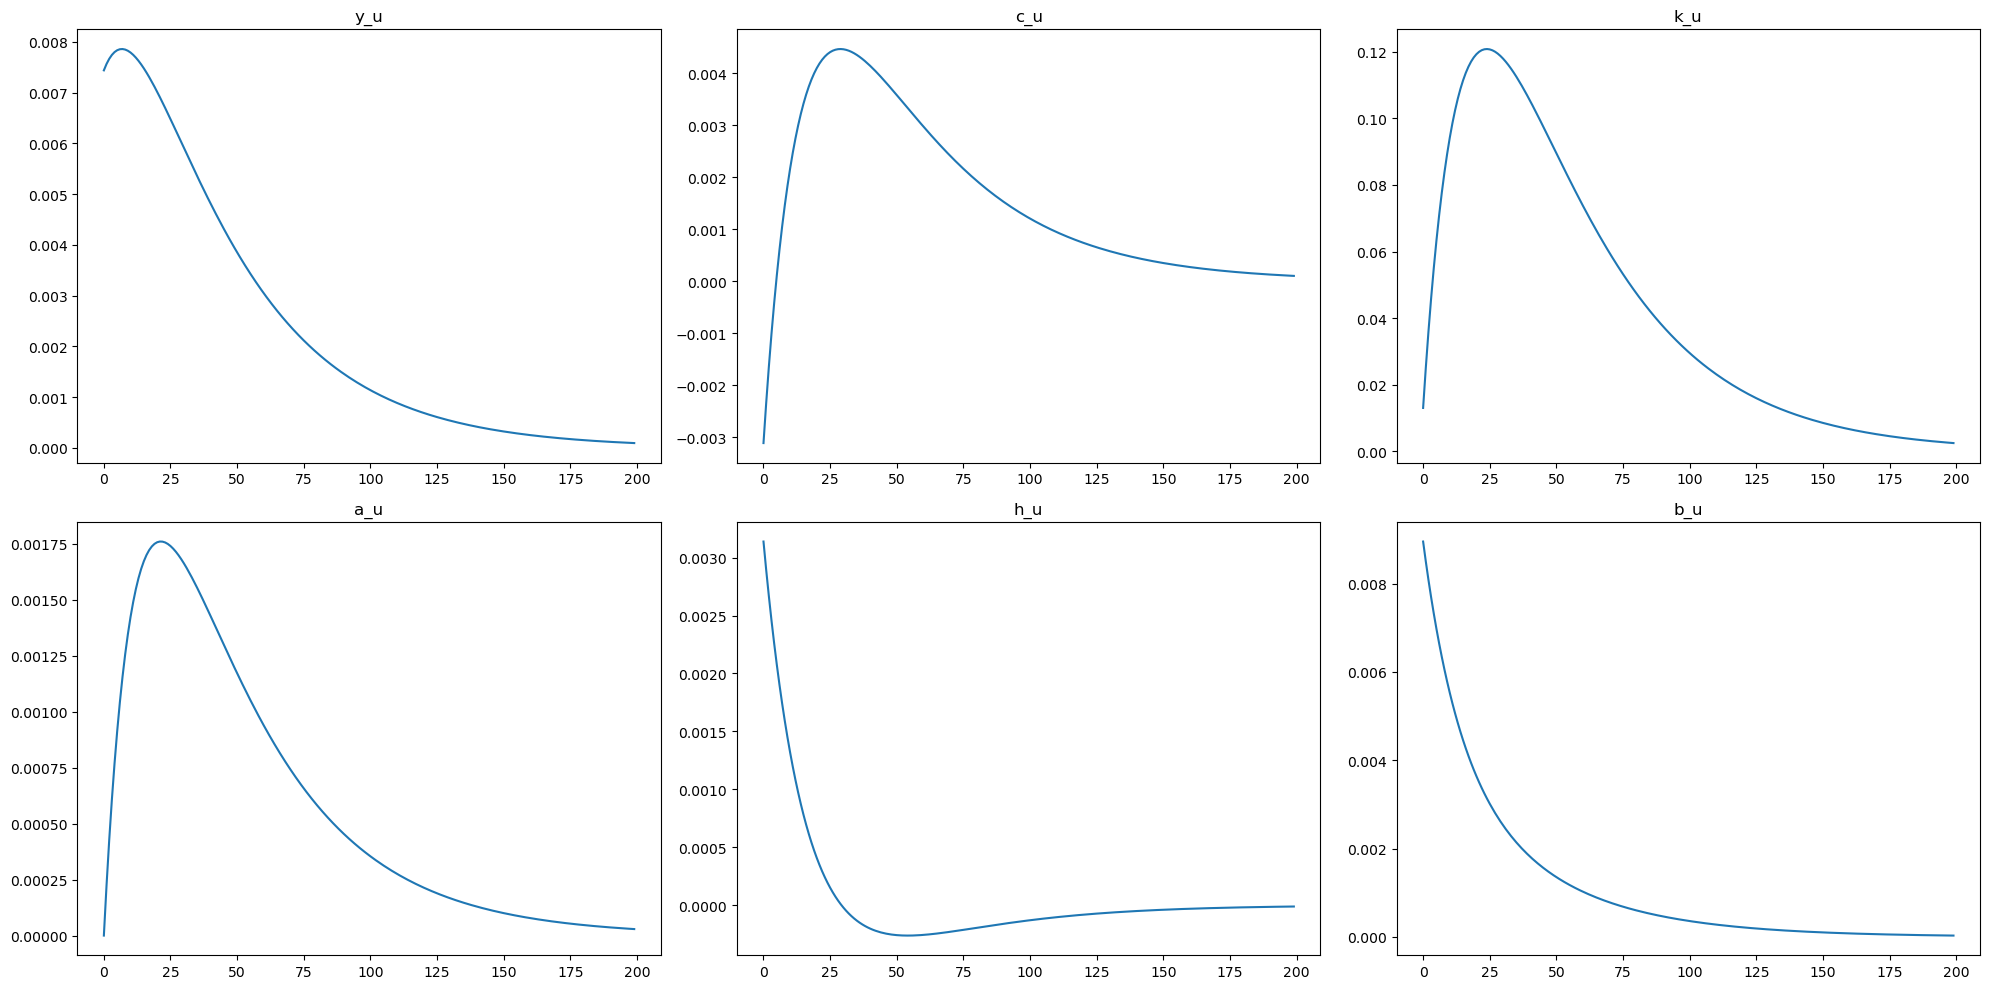

In [11]:
for shock in {key[-1] for key in t1.dict_irfs.keys()}:
    t1.plot_irfs(shock,cols=3)